In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from itertools import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cars_dataset.csv')

In [ ]:
df

,Unnamed: 0,mark,Box,Drive_unit,Seats,Doors,Country,Engine,Volume,Color,...,Consumption,Engine_Power,Restyling,Release_start_series,End_Serial,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
0,0,Mercedes-Benz,automatic,full,5.0,5.0,German,diesel,2.9,black,...,9.8,NaN,0.0,2018.0,2020.0,667.0,1941.0,11.5,9.2,9.8
1,1,Mercedes-Benz,automatic,full,5.0,5.0,German,diesel,2.9,green,...,9.6,NaN,0.0,2018.0,2020.0,667.0,1941.0,10.8,8.9,9.6
2,2,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,black,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
3,3,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,black,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
4,4,Mercedes-Benz,automatic,full,5.0,5.0,German,gasoline,4.0,gray,...,12.1,direct injection (direct),0.0,2018.0,2020.0,667.0,1941.0,14.1,10.8,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22697,36660,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.4,silver,...,8.9,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.3,6.9,8.9
22698,36661,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.7,gray,...,10.7,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.4,8.7,10.7
22699,36662,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.4,black,...,8.9,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.3,6.9,8.9
22700,36663,Chrysler,automatic,front,5.0,4.0,USA,gasoline,2.7,black,...,10.7,distributed injection (multi-point),0.0,2006.0,2010.0,441.0,0.0,12.4,8.7,10.7


# Анализ

Обратим внимание на ряд числовых показателей:

*   `Year` - год выпуска
*   `Price` - цена
*   `Width` - вес

Средный год выпуска меньше медианного на 2 года, это скорее всего связано с тем, что с каждым годом количество выпускаемых автомобилей увеличивается.

Средняя цена в несколько раз меньше медианной, это связанно с тем, что данные скошены в сторону минимальной цены. Это значит что количество авто с низкой стоимостью намного больше, чем авто с высокой ценой.

Однако значения среднего и медианного веса почти одинаковые, значит вес распределен нормально. Это просходит из-за того что все автомобили имеют примерно одинаковый вес, почти не будет выбросов.




In [ ]:
df.describe()

,Unnamed: 0,Seats,Doors,Volume,Mileage,Price,Year,Engine_volume,Width,Diameter_cylinder_and_stroke_piston,...,Compression_ratio,Consumption,Restyling,Release_start_series,End_Serial,Trunk_volume_max,Trunk_volume_min,Expense_city,Expense_track,Consumption_average
count,22702.000000,22702.00000,22702.000000,22702.000000,22702.000000,2.270200e+04,22702.000000,22702.000000,22702.000000,22702.000000,...,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000,22702.000000
mean,18318.491499,5.01251,4.418774,2.334922,136649.516210,1.353936e+06,2009.204563,2337.199911,1813.402914,73.521181,...,11.149437,7.154378,0.339794,2006.610078,2011.682451,472.146991,853.949520,8.730698,5.339745,6.605114
std,10561.840988,0.76348,0.810206,1.049301,101154.431413,2.493866e+06,9.116164,1037.923141,98.746721,27.948965,...,2.438177,3.640578,0.473650,10.340075,8.284589,321.706597,937.394434,5.345248,3.120095,3.929169
min,0.000000,1.00000,0.000000,0.000000,0.000000,2.000000e+04,1927.000000,599.000000,1275.000000,0.000000,...,5.800000,0.000000,0.000000,1927.000000,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9038.750000,5.00000,4.000000,1.600000,62322.000000,3.740750e+05,2006.000000,1598.000000,1755.000000,77.000000,...,10.000000,6.100000,0.000000,2003.000000,2008.000000,352.000000,0.000000,6.900000,4.700000,5.600000
50%,18573.500000,5.00000,5.000000,2.000000,125000.000000,6.800000e+05,2011.000000,1997.000000,1810.000000,82.000000,...,10.500000,7.400000,0.000000,2008.000000,2013.000000,456.000000,815.000000,9.400000,5.800000,7.200000
75%,27572.750000,5.00000,5.000000,2.700000,191786.000000,1.420000e+06,2015.000000,2693.000000,1875.000000,86.200000,...,11.149437,9.100000,1.000000,2013.000000,2018.000000,530.000000,1547.000000,11.700000,7.100000,8.800000
max,36664.000000,9.00000,5.000000,8.100000,1000000.000000,1.300000e+08,2020.000000,8128.000000,2360.000000,108.000000,...,23.000000,28.200000,1.000000,2020.000000,2020.000000,5800.000000,9300.000000,36.200000,21.100000,28.200000


Необходимо убрать пропуски в данных для корректной обработки в дальнейшем. Пропуски заменяются на медианные значения.

In [ ]:
df['Year'] = df['Year'].fillna(df['Year'].median())

In [ ]:
df['Width'] = df['Width'].fillna(df['Width'].median())

Удалим из данных авто, которые выпущены до 1950 года.

In [ ]:
index_list = df[df['Year'] < 1950].index
df = df.drop(index_list)

## Проверка на нормальное распределение

### Визуальный анализ (гистограммы)

Построим гистограммы интеерсующих нас признаков, а также наложим поверх гистограм то, как бы выглядело нормальное распределение с параметрами, рассчитанными на основе выборок.

Мы можем видеть, что нельзя сделать выводы только на счет параметра `Width`, остальные парамерты распределены точно ненормально.



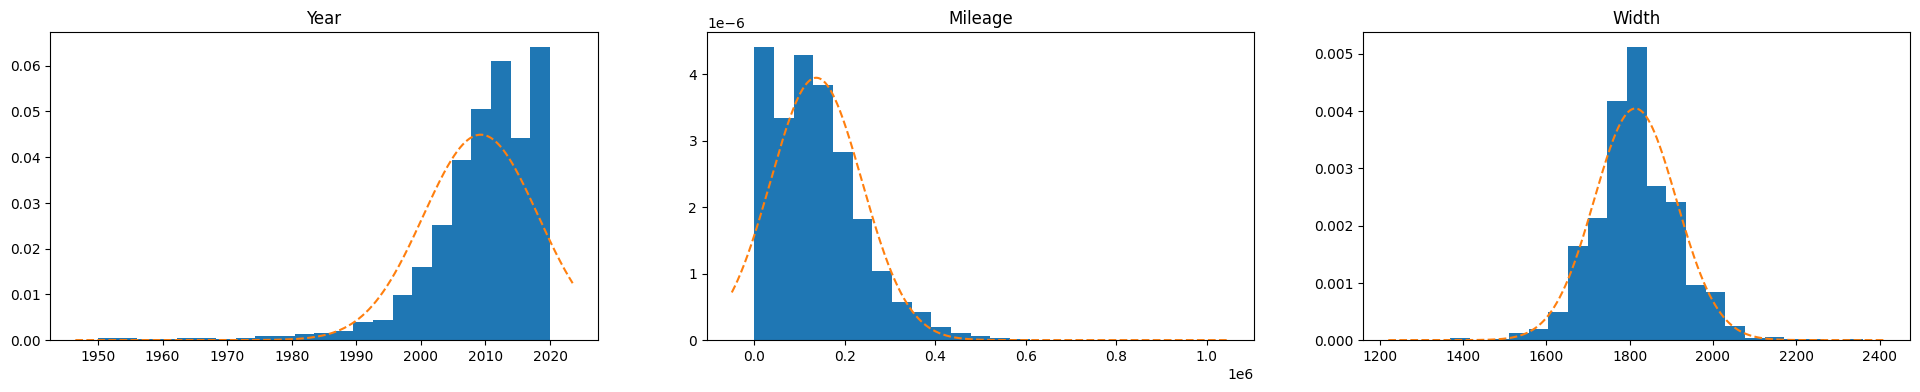

In [ ]:
keys = ['Year', 'Mileage', 'Width']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)

    loc = df[key].mean()
    scale = df[key].std()

    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)

    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

### Визуальный анализ (квантили)

Построим Q-Q кривую. Это график, который показывает соответствие между теоретическим значением квантиля на выборке и его реальным значением.

Чем ближке график к графику $y=x$, тем более нормальным является распределение значений выборки.

Как мы и говорили ранее `Year` и `Price` не являются распределёнными нормально. Тогда как `Width` распределён относительно нормально.

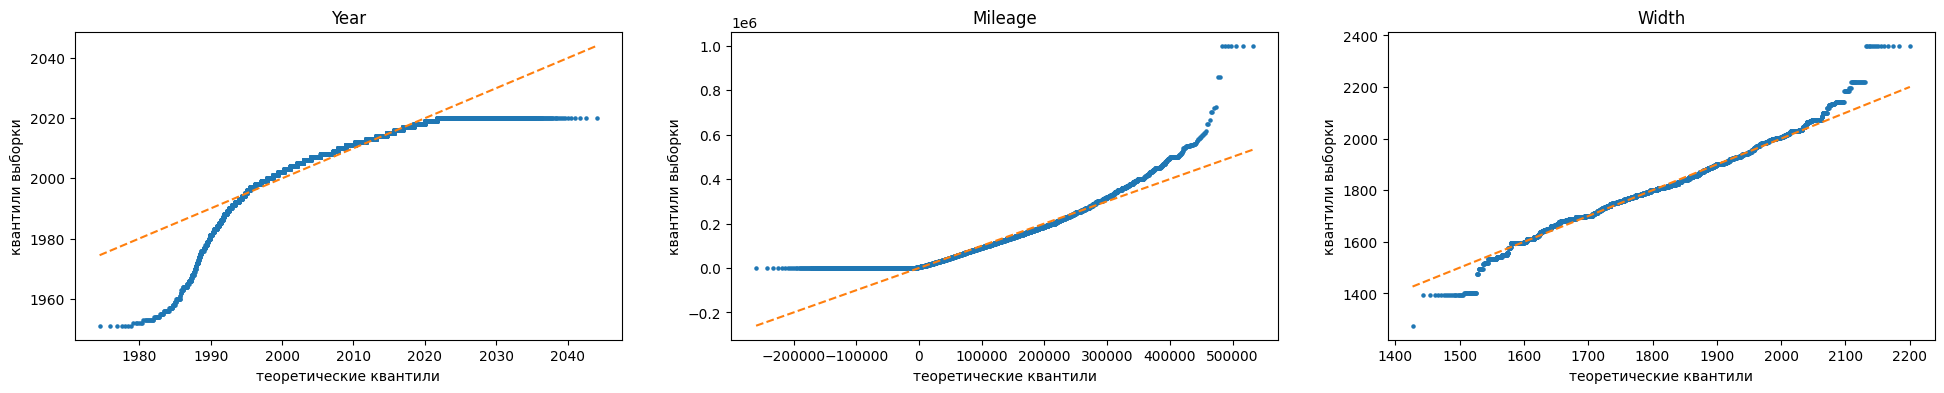

In [ ]:
fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    interval = np.linspace(0, 1, samples.shape[0])[1:-1]
    x = stats.norm.ppf(interval, loc=loc, scale=scale)
    y = np.quantile(samples, interval)

    ax.scatter(x, y, s=5)
    ax.plot(x, x, color='C1', linestyle='dashed')

    ax.set_title(key)
    ax.set_xlabel('теоретические квантили')
    ax.set_ylabel('квантили выборки')

### Стастические показатели для выборок

Оценим нормальность выборок также  на основании известных характеристик нормального распределения. В частности:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными.

На основании такой оценки `Width` сильно ближе к нормально распределению, чем `Price` и `Year`, что достаточно логично. Дешевых и новых автомобилей больше.

Тот факт, что распределения данных значений явлются нормальными или близкими к ним позволяет использовать другие методы для анализа взаимосвязей в данных.

In [ ]:
for key in keys:
    print(key)

    samples = df[key]

    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')

    print()

Year
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7695326278659612
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9629629629629629
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9826719576719577

Mileage
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6832451499118166
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9589506172839506
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9906966490299823

Width
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.6977954144620812
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9515873015873015
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		0.9928571428571429



## Регрессия между ценой и годом выпуска, есть ли?

### Визуализация

На графике сложно определить зависимости. Вполне возможно если отбросить выбросы по цене, то зависимость будет видна.

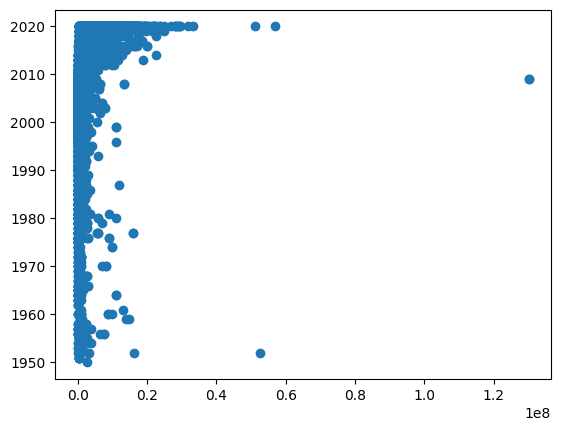

In [ ]:
plt.scatter(df['Price'], df['Year'])
plt.show()

### Рассчёт регрессии и проверка значимости

Рассчитыаем коэффициенты регрессии и изначения для для каждого из значений выборок. Результат расчёт показывает, что регрессия плохо описывает зависимость между данными и корее всего зависимости нет.

In [ ]:
ones = np.ones((len(df['Price']),1))
x_pot = np.hstack((ones, df['Price'].values.reshape(len(df['Price']),1)))

In [ ]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Year'])
z = x_pot.dot(b)
e = df['Year'] - z

In [ ]:
R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Year']))
R

0.08272386018670841

## Верно ли, что пробег у японских автомобилей иной.

Разделим нашу выборку на две части с японскими авто и всеми остальными.

Проведём дисперсионный анализ для пробега по выборке. Так как $F > t$, то можно точно сказать, что количество пройденных киломертов зависит от страны производителя.

In [ ]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2 #Межгрупповая сумма квадратов
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum() #Внутригрупповая сумма квадратов

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1 #Межгрупповая дисперсия
  sigma2_w = SS_w / k2 #Внутригрупповая дисперсия
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05 # Допуск ошибки

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [ ]:
df1 = df[df['Country'] == 'Japan']
df2 = df[df['Country'] != 'Japan']

In [ ]:
var_analise(df, df1, df2, 'Mileage')

True

In [ ]:
res1_mean = df1['Mileage'].mean()
res2_mean = df2['Mileage'].mean()

print(f'Japan: {res1_mean}, Other {res2_mean}')

Japan: 162664.17642698294, Other 128646.47193936589


Разделим нашу выборку на две части с бензиновыми и дизельными авто.

Проведём дисперсионный анализ для пробега по выборке. Так как $F > t$, то можно точно сказать, что количество пройденных киломертов зависит от типа топлива.

In [ ]:
df3 = df[df['Engine'] == 'diesel']
df4 = df[df['Engine'] != 'gasoline']

In [ ]:
var_analise(df, df3, df4, 'Mileage')

True

In [ ]:
res3_mean = df3['Mileage'].mean()
res4_mean = df4['Mileage'].mean()

print(f'Diesel: {res3_mean}, Gasoline {res4_mean}')

Diesel: 141778.62648809524, Gasoline 139970.10353606788


# Выводы

Мы можем сказать, что пробег нормально не распределен, однако и околонормальное распределение веса не несет в себе какой-то глубокий смысл.

